# Exploratory Data Analysis for LIS 198A Basic Data Analytics

## Importing and Cleaning of Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

# Function to format the y-axis to "millions"
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

# Function to format y-axis as percentages
def percentage_formatter(x, pos):
    return f'{x:.1f}%'

# Loading the CSV File
df = pd.read_csv('2023 dataset.csv')

# Rename columns
df.columns = ['Rank', 'Country', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Total', 'Share']

# Dropping 'Total' and 'Share' column
df = df.drop(columns=['Total','Share'])

# Defining the Monthly columns
monthly_columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert numeric columns to proper data types
cols_to_numeric = df.columns[2:]  # Remaining columns after 'Rank' and 'Country'
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(",", ""), errors='coerce')

# Dataset information
print("\nDataset Info:")
print(df.info())

# Total visitor arrivals by month
monthly_totals = df[cols_to_numeric].sum()
print("\nTotal Arrivals by Month:")
print(monthly_totals)

# Sum across all monthly columns to get a total for each country
df['Monthly_Total'] = df[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].sum(axis=1)

# Statistical summary
print("\n2. Statistical Summary:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     241 non-null    int64  
 1   Country  241 non-null    object 
 2   Jan      206 non-null    float64
 3   Feb      205 non-null    float64
 4   Mar      217 non-null    float64
 5   Apr      213 non-null    float64
 6   May      217 non-null    float64
 7   Jun      215 non-null    float64
 8   Jul      218 non-null    float64
 9   Aug      216 non-null    float64
 10  Sep      215 non-null    float64
 11  Oct      212 non-null    float64
 12  Nov      221 non-null    float64
 13  Dec      220 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 26.5+ KB
None

Total Arrivals by Month:
Jan    425145.0
Feb    431618.0
Mar    436246.0
Apr    417251.0
May    353049.0
Jun    407158.0
Jul    467883.0
Aug    403980.0
Sep    356237.0
Oct    378073.0
Nov    411831.0
D

## Creating the first basic plot

Month with the lowest visitors: May (353,049.0 visitors)
Month with the highest visitors: Dec (514,359.0 visitors)


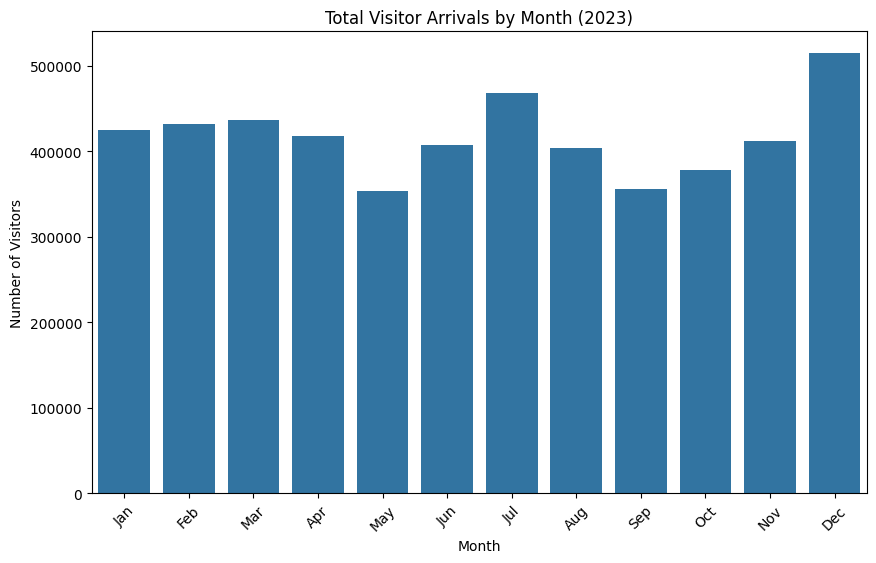

In [2]:
# Find the month with the lowest and highest visitors
lowest_month = monthly_totals.idxmin()
lowest_value = monthly_totals.min()

highest_month = monthly_totals.idxmax()
highest_value = monthly_totals.max()

# Print the results
print(f"Month with the lowest visitors: {lowest_month} ({lowest_value:,} visitors)")
print(f"Month with the highest visitors: {highest_month} ({highest_value:,} visitors)")

# Visualize monthly totals in accordance with the dataset
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_totals.index, y=monthly_totals.values)
plt.title('Total Visitor Arrivals by Month (2023)')
plt.ylabel('Number of Visitors')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

## Visualizing the top countries that visit the Philippines


Top 5 Countries by Visitor Arrivals (Percentage of Total):
rSOUTH KOREA: 1,450,858.0 visitors (45.48%)
UNITED STATES OF AMERICA: 903,299.0 visitors (28.32%)
JAPAN: 305,580.0 visitors (9.58%)
AUSTRALIA: 266,551.0 visitors (8.36%)
CHINA: 263,836.0 visitors (8.27%)


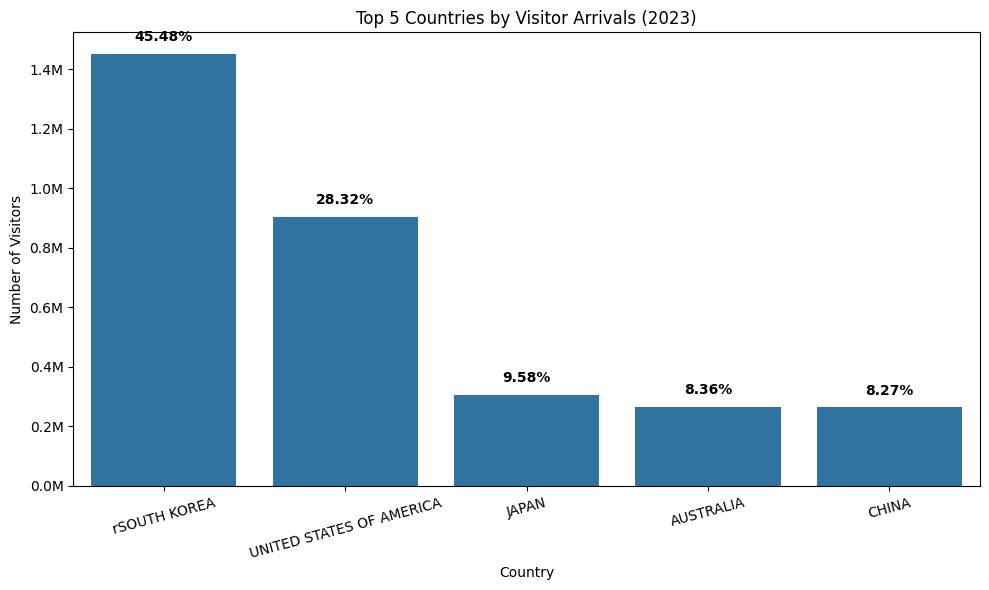

In [3]:
# Sort by 'Monthly_Total' in descending order and select the top 5 countries
top5_countries = df.sort_values(by='Monthly_Total', ascending=False).head(5)

# Calculate the percentage share of each country's total
total_visitors = top5_countries['Monthly_Total'].sum()
top5_countries['Percentage'] = (top5_countries['Monthly_Total'] / total_visitors) * 100

# Print the top 5 countries with their percentages
print("\nTop 5 Countries by Visitor Arrivals (Percentage of Total):")
for index, row in top5_countries.iterrows():
    print(f"{row['Country']}: {row['Monthly_Total']:,} visitors ({row['Percentage']:.2f}%)")

# Plot the top 5 countries with visitor counts
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Monthly_Total', data=top5_countries)

# Add percentage annotations on top of the bars
for index, row in enumerate(top5_countries.itertuples()):
    plt.text(index, row.Monthly_Total + total_visitors * 0.01,  # Adjust position slightly above the bar
             f"{row.Percentage:.2f}%", 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Customize the chart
plt.title('Top 5 Countries by Visitor Arrivals (2023)')
plt.xlabel('Country')
plt.ylabel('Number of Visitors')
plt.xticks(rotation=15)  # Rotate x-axis labels for readability

# Format y-axis to display values in millions
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Show the chart
plt.tight_layout()
plt.show()

Standard Deviation of Monthly Visitors for Top 5 Countries:
                    Country  Standard_Deviation
0              rSOUTH KOREA        16605.507377
1  UNITED STATES OF AMERICA        15377.027721
2                     JAPAN         5907.856772
3                 AUSTRALIA         5760.631759
4                     CHINA         6695.478981


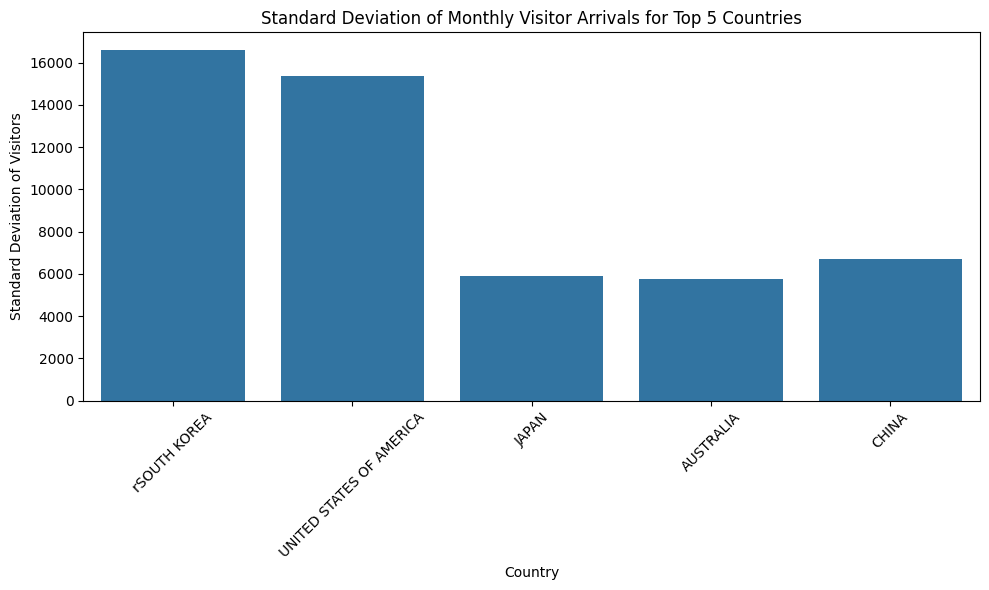

In [8]:
# Step 2: Calculate standard deviation of monthly visitors for each top 5 country
top5_std = top5_countries[['Country'] + monthly_columns].copy()
top5_std['Standard_Deviation'] = top5_std[monthly_columns].std(axis=1)

# Step 3: Display results
print("Standard Deviation of Monthly Visitors for Top 5 Countries:")
print(top5_std[['Country', 'Standard_Deviation']])

# Step 4: Optional Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Standard_Deviation', data=top5_std)

# Customize the plot
plt.title('Standard Deviation of Monthly Visitor Arrivals for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Standard Deviation of Visitors')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

## Comparing visitor arrivals on a monthly basis

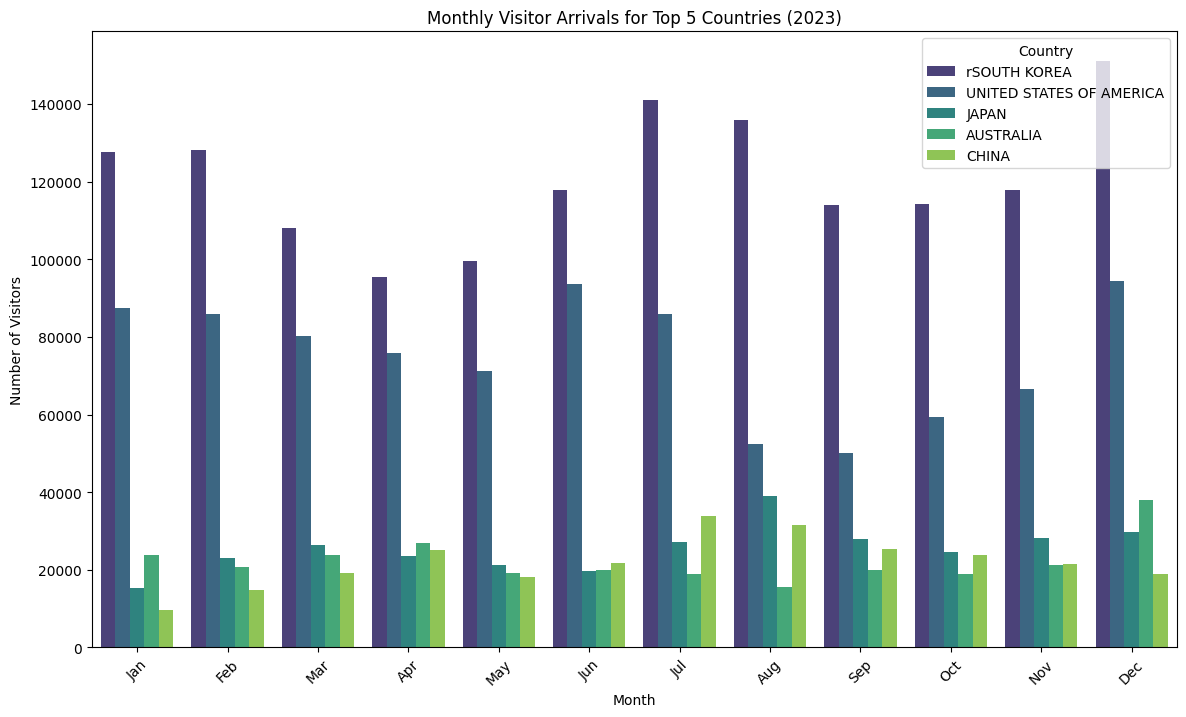

In [5]:
# Melt the DataFrame to long format (Country, Month, Visitor Count)
df_long = top5_countries.melt(id_vars='Country', 
                              value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                              var_name='Month', 
                              value_name='Visitor_Count')

# Plot the grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Month', y='Visitor_Count', hue='Country', data=df_long, palette='viridis')

# Customize the chart
plt.title('Monthly Visitor Arrivals for Top 5 Countries (2023)')
plt.xlabel('Month')
plt.ylabel('Number of Visitors')
plt.legend(title='Country')
plt.xticks(rotation=45)  # Rotate x-axis for readability

# Show the chart
plt.show()

## Visualizing percent(%) changes of visitors on a monthly basis

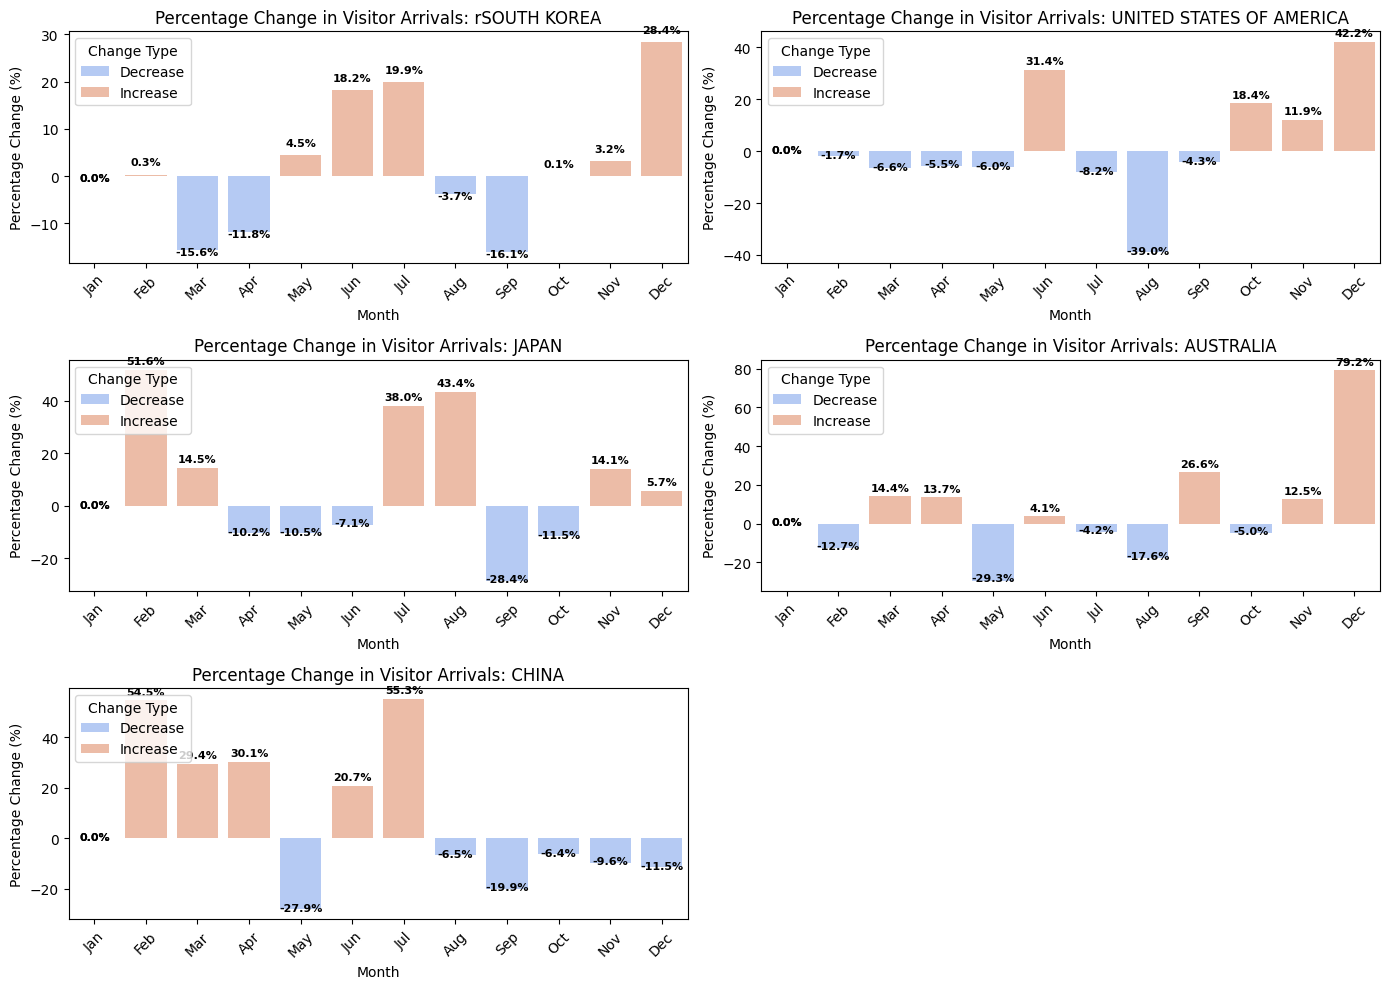

In [6]:
# Calculate month-over-month percentage changes
top5_pct_change = top5_countries[['Country'] + monthly_columns].copy()
top5_pct_change[monthly_columns] = top5_pct_change[monthly_columns].pct_change(axis=1) * 100

# Melt the DataFrame to long format for plotting
df_long_pct = top5_pct_change.melt(id_vars='Country', var_name='Month', value_name='Pct_Change')

# Separate Positive and Negative Changes
df_long_pct['Change_Type'] = df_long_pct['Pct_Change'].apply(lambda x: 'Increase' if x > 0 else 'Decrease')

# Plot side-by-side graphs for each top 5 country
plt.figure(figsize=(14, 10))

# Loop through each country and create a subplot
for idx, country in enumerate(top5_countries['Country'], start=1):
    plt.subplot(3, 2, idx)  # 3 rows, 2 columns of subplots
    country_data = df_long_pct[df_long_pct['Country'] == country]
    
    # Create grouped bar chart
    sns.barplot(x='Month', y='Pct_Change', hue='Change_Type', data=country_data, palette='coolwarm', errorbar=None)

    # Annotate the bars with actual percentage values
    for i, bar in enumerate(plt.gca().patches):
        height = bar.get_height()  # Get the bar height (percentage change)
        if not pd.isna(height):  # Skip NaN values
            plt.text(bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
                     height + (1.5 if height > 0 else -1.5),  # Y position (slightly above/below the bar)
                     f"{height:.1f}%",  # Text to display (formatted as 1 decimal percentage)
                     ha='center', va='bottom', fontsize=8, color='black', fontweight='bold')

    # Customize each subplot
    plt.title(f'Percentage Change in Visitor Arrivals: {country}')
    plt.xlabel('Month')
    plt.ylabel('Percentage Change (%)')
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.legend(title='Change Type', loc='upper left')

plt.tight_layout()
plt.show()

## Side-by-side comparison of monthly percentage(%) changes in visitors

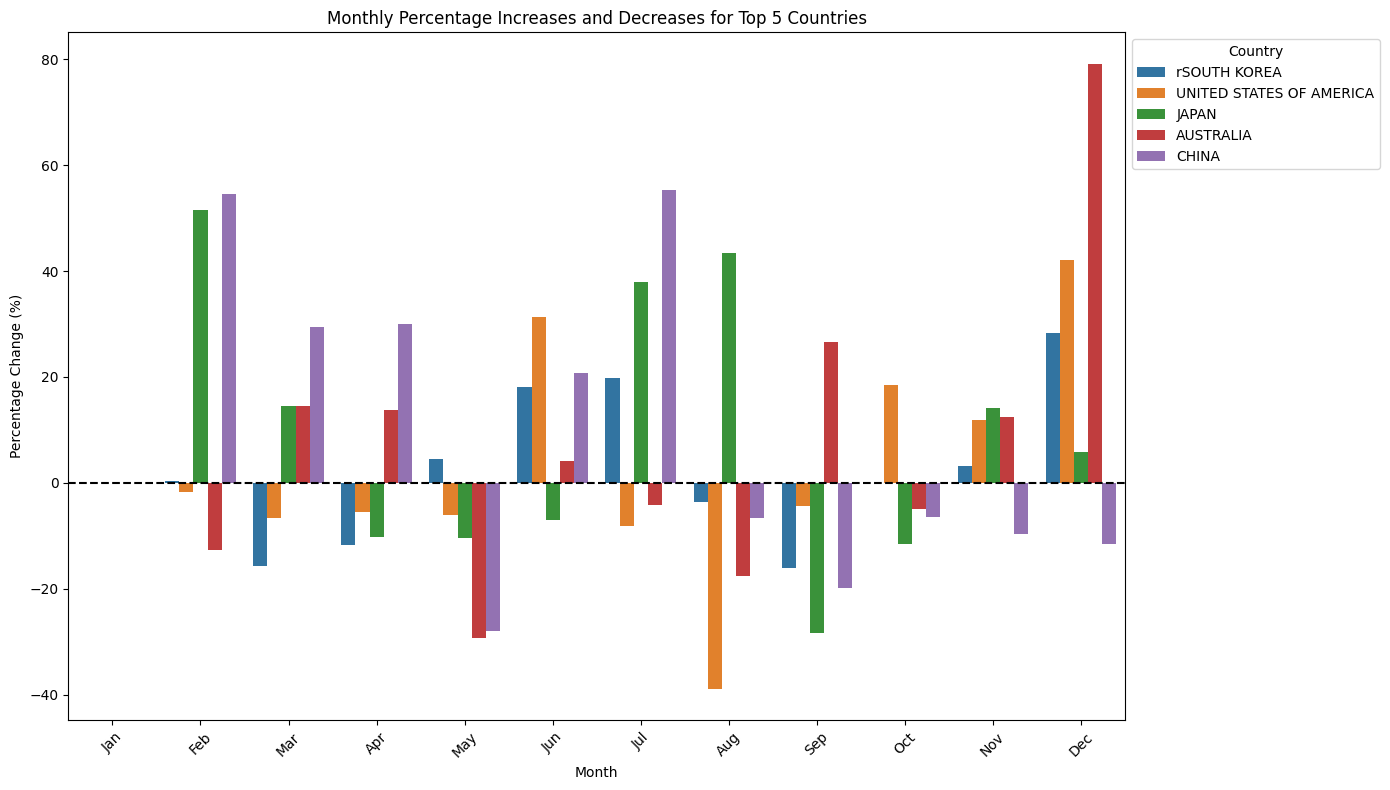

In [7]:
# Calculate month-over-month percentage changes
top5_pct_change = top5_countries[['Country'] + monthly_columns].copy()
top5_pct_change[monthly_columns] = top5_pct_change[monthly_columns].pct_change(axis=1) * 100

# Melt to long format for plotting
df_long_pct = top5_pct_change.melt(id_vars='Country', var_name='Month', value_name='Pct_Change')

# Define colors for increases and decreases
df_long_pct['Change_Type'] = df_long_pct['Pct_Change'].apply(lambda x: 'Increase' if x > 0 else 'Decrease')

# Plot a grouped bar chart for all countries
plt.figure(figsize=(14, 8))
sns.barplot(
    x='Month', 
    y='Pct_Change', 
    hue='Country', 
    data=df_long_pct, 
    palette='tab10', 
    dodge=True
)

# Customize the chart
plt.title('Monthly Percentage Increases and Decreases for Top 5 Countries')
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')
plt.axhline(0, color='black', linestyle='--')  # Add a horizontal line at 0%
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
plt.xticks(rotation=45)  # Rotate x-axis labels

# Adjust layout and display the chart
plt.tight_layout()
plt.show()